<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [26]:
StkData = pd.read_csv('Data/APPLE.csv')


### Data Proprocessing

In [27]:
def Dataset(Data, Date):

  Train_Data = Data['Adj Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [28]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [29]:
model = Model()

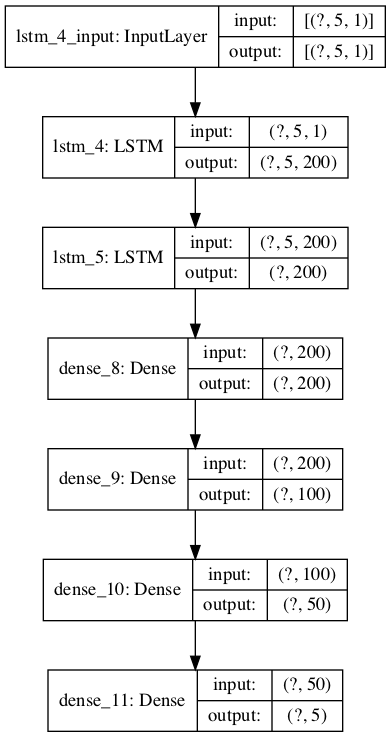

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 200)            161600    
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
________________________________________________

### Custom Learning Rate

In [32]:
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

In [33]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [34]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [35]:
StkData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.85,27.86,26.84,27.33,24.86,212818400.0
1,2015-01-05,27.07,27.16,26.35,26.56,24.16,257142000.0
2,2015-01-06,26.64,26.86,26.16,26.57,24.16,263188400.0
3,2015-01-07,26.80,27.05,26.67,26.94,24.50,160423600.0
4,2015-01-08,27.31,28.04,27.17,27.97,25.44,237458000.0


In [36]:
StkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1549 non-null   object 
 1   Open       1549 non-null   float64
 2   High       1549 non-null   float64
 3   Low        1549 non-null   float64
 4   Close      1549 non-null   float64
 5   Adj Close  1549 non-null   float64
 6   Volume     1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


In [37]:
# Change Dtype of Date column
StkData["Date"] = pd.to_datetime(StkData["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [47]:
StkData_Date = '2020-10-01'
StkData_Train_X, StkData_Train_Y, StkData_Test_X, StkData_Test_Y = Dataset(StkData, StkData_Date)

### Model Fitting

In [39]:
StkData_Model = Model()

In [40]:
StkData_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [41]:
StkData_hist = StkData_Model.fit(StkData_Train_X, StkData_Train_Y, epochs = 1000, validation_data = (StkData_Test_X, StkData_Test_Y), callbacks=[callback])

Train on 288 samples, validate on 19 samples
Epoch 1/1000
288/288 [==============================] - 5s 18ms/sample - loss: 2300.2670 - root_mean_squared_error: 47.9611 - val_loss: 15626.1973 - val_root_mean_squared_error: 125.0048
Epoch 2/1000
288/288 [==============================] - 0s 1ms/sample - loss: 2300.2525 - root_mean_squared_error: 47.9609 - val_loss: 15625.8984 - val_root_mean_squared_error: 125.0036
Epoch 3/1000
288/288 [==============================] - 0s 1ms/sample - loss: 2300.2050 - root_mean_squared_error: 47.9605 - val_loss: 15625.3174 - val_root_mean_squared_error: 125.0013
Epoch 4/1000
288/288 [==============================] - 0s 1ms/sample - loss: 2300.1269 - root_mean_squared_error: 47.9596 - val_loss: 15624.4189 - val_root_mean_squared_error: 124.9977
Epoch 5/1000
288/288 [==============================] - 0s 1ms/sample - loss: 2300.0102 - root_mean_squared_error: 47.9584 - val_loss: 15623.2715 - val_root_mean_squared_error: 124.9931
Epoch 6/1000
288/288 [==

Epoch 88/1000
288/288 [==============================] - 0s 1ms/sample - loss: 961.9251 - root_mean_squared_error: 31.0149 - val_loss: 4983.3530 - val_root_mean_squared_error: 70.5929
Epoch 89/1000
288/288 [==============================] - 0s 1ms/sample - loss: 863.4235 - root_mean_squared_error: 29.3841 - val_loss: 4403.0879 - val_root_mean_squared_error: 66.3558
Epoch 90/1000
288/288 [==============================] - 0s 1ms/sample - loss: 775.5170 - root_mean_squared_error: 27.8481 - val_loss: 3927.9160 - val_root_mean_squared_error: 62.6731
Epoch 91/1000
288/288 [==============================] - 0s 1ms/sample - loss: 699.6647 - root_mean_squared_error: 26.4512 - val_loss: 3601.4573 - val_root_mean_squared_error: 60.0121
Epoch 92/1000
288/288 [==============================] - 0s 1ms/sample - loss: 638.2123 - root_mean_squared_error: 25.2629 - val_loss: 3435.4653 - val_root_mean_squared_error: 58.6128
Epoch 93/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5

288/288 [==============================] - 0s 1ms/sample - loss: 11.3801 - root_mean_squared_error: 3.3734 - val_loss: 36.6459 - val_root_mean_squared_error: 6.0536
Epoch 134/1000
288/288 [==============================] - 0s 2ms/sample - loss: 11.1745 - root_mean_squared_error: 3.3428 - val_loss: 35.1461 - val_root_mean_squared_error: 5.9284
Epoch 135/1000
288/288 [==============================] - 1s 2ms/sample - loss: 10.9158 - root_mean_squared_error: 3.3039 - val_loss: 35.4454 - val_root_mean_squared_error: 5.9536
Epoch 136/1000
288/288 [==============================] - 0s 1ms/sample - loss: 10.7008 - root_mean_squared_error: 3.2712 - val_loss: 35.0935 - val_root_mean_squared_error: 5.9240
Epoch 137/1000
288/288 [==============================] - 0s 1ms/sample - loss: 10.4908 - root_mean_squared_error: 3.2390 - val_loss: 34.4357 - val_root_mean_squared_error: 5.8682
Epoch 138/1000
288/288 [==============================] - 0s 1ms/sample - loss: 10.2993 - root_mean_squared_error: 

Epoch 179/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.9363 - root_mean_squared_error: 2.6337 - val_loss: 25.5341 - val_root_mean_squared_error: 5.0531
Epoch 180/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.9066 - root_mean_squared_error: 2.6280 - val_loss: 25.5283 - val_root_mean_squared_error: 5.0526
Epoch 181/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.8817 - root_mean_squared_error: 2.6233 - val_loss: 25.5816 - val_root_mean_squared_error: 5.0578
Epoch 182/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.8713 - root_mean_squared_error: 2.6213 - val_loss: 25.4367 - val_root_mean_squared_error: 5.0435
Epoch 183/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.8494 - root_mean_squared_error: 2.6171 - val_loss: 25.5146 - val_root_mean_squared_error: 5.0512
Epoch 184/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.8185 - root_mean_square

Epoch 225/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.3264 - root_mean_squared_error: 2.5152 - val_loss: 24.9301 - val_root_mean_squared_error: 4.9930
Epoch 226/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.3245 - root_mean_squared_error: 2.5149 - val_loss: 24.4950 - val_root_mean_squared_error: 4.9492
Epoch 227/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.3021 - root_mean_squared_error: 2.5104 - val_loss: 24.6177 - val_root_mean_squared_error: 4.9616
Epoch 228/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.2949 - root_mean_squared_error: 2.5090 - val_loss: 24.7182 - val_root_mean_squared_error: 4.9717
Epoch 229/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.2964 - root_mean_squared_error: 2.5093 - val_loss: 24.6068 - val_root_mean_squared_error: 4.9605
Epoch 230/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.2799 - root_mean_square

Epoch 271/1000
288/288 [==============================] - 0s 1ms/sample - loss: 6.0510 - root_mean_squared_error: 2.4599 - val_loss: 23.8854 - val_root_mean_squared_error: 4.8873
Epoch 272/1000
288/288 [==============================] - 0s 2ms/sample - loss: 6.0451 - root_mean_squared_error: 2.4587 - val_loss: 23.9436 - val_root_mean_squared_error: 4.8932
Epoch 273/1000
288/288 [==============================] - 0s 2ms/sample - loss: 6.0412 - root_mean_squared_error: 2.4579 - val_loss: 23.8909 - val_root_mean_squared_error: 4.8878
Epoch 274/1000
288/288 [==============================] - 0s 2ms/sample - loss: 6.0332 - root_mean_squared_error: 2.4563 - val_loss: 23.8873 - val_root_mean_squared_error: 4.8875
Epoch 275/1000
288/288 [==============================] - 1s 2ms/sample - loss: 6.0426 - root_mean_squared_error: 2.4582 - val_loss: 24.0020 - val_root_mean_squared_error: 4.8992
Epoch 276/1000
288/288 [==============================] - 1s 2ms/sample - loss: 6.0283 - root_mean_square

Epoch 317/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8975 - root_mean_squared_error: 2.4285 - val_loss: 23.3994 - val_root_mean_squared_error: 4.8373
Epoch 318/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8948 - root_mean_squared_error: 2.4279 - val_loss: 23.4600 - val_root_mean_squared_error: 4.8435
Epoch 319/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8986 - root_mean_squared_error: 2.4287 - val_loss: 23.3472 - val_root_mean_squared_error: 4.8319
Epoch 320/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8855 - root_mean_squared_error: 2.4260 - val_loss: 23.3403 - val_root_mean_squared_error: 4.8312
Epoch 321/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8879 - root_mean_squared_error: 2.4265 - val_loss: 23.2628 - val_root_mean_squared_error: 4.8232
Epoch 322/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.8810 - root_mean_square

Epoch 363/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7962 - root_mean_squared_error: 2.4075 - val_loss: 22.9648 - val_root_mean_squared_error: 4.7922
Epoch 364/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7947 - root_mean_squared_error: 2.4072 - val_loss: 22.9699 - val_root_mean_squared_error: 4.7927
Epoch 365/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7955 - root_mean_squared_error: 2.4074 - val_loss: 23.0593 - val_root_mean_squared_error: 4.8020
Epoch 366/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7951 - root_mean_squared_error: 2.4073 - val_loss: 23.0644 - val_root_mean_squared_error: 4.8025
Epoch 367/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7925 - root_mean_squared_error: 2.4068 - val_loss: 23.0162 - val_root_mean_squared_error: 4.7975
Epoch 368/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7920 - root_mean_square

Epoch 409/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7282 - root_mean_squared_error: 2.3934 - val_loss: 22.7676 - val_root_mean_squared_error: 4.7715
Epoch 410/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7275 - root_mean_squared_error: 2.3932 - val_loss: 22.7478 - val_root_mean_squared_error: 4.7695
Epoch 411/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7249 - root_mean_squared_error: 2.3927 - val_loss: 22.7473 - val_root_mean_squared_error: 4.7694
Epoch 412/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7266 - root_mean_squared_error: 2.3930 - val_loss: 22.8002 - val_root_mean_squared_error: 4.7750
Epoch 413/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7231 - root_mean_squared_error: 2.3923 - val_loss: 22.7556 - val_root_mean_squared_error: 4.7703
Epoch 414/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.7273 - root_mean_square

Epoch 455/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6574 - root_mean_squared_error: 2.3785 - val_loss: 22.4929 - val_root_mean_squared_error: 4.7427
Epoch 456/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6611 - root_mean_squared_error: 2.3793 - val_loss: 22.5560 - val_root_mean_squared_error: 4.7493
Epoch 457/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6594 - root_mean_squared_error: 2.3790 - val_loss: 22.4748 - val_root_mean_squared_error: 4.7408
Epoch 458/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6541 - root_mean_squared_error: 2.3778 - val_loss: 22.4816 - val_root_mean_squared_error: 4.7415
Epoch 459/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6518 - root_mean_squared_error: 2.3774 - val_loss: 22.5081 - val_root_mean_squared_error: 4.7443
Epoch 460/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.6481 - root_mean_square

Epoch 501/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5809 - root_mean_squared_error: 2.3624 - val_loss: 22.2284 - val_root_mean_squared_error: 4.7147
Epoch 502/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5776 - root_mean_squared_error: 2.3617 - val_loss: 22.1859 - val_root_mean_squared_error: 4.7102
Epoch 503/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5777 - root_mean_squared_error: 2.3617 - val_loss: 22.1668 - val_root_mean_squared_error: 4.7082
Epoch 504/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5730 - root_mean_squared_error: 2.3607 - val_loss: 22.1741 - val_root_mean_squared_error: 4.7089
Epoch 505/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5724 - root_mean_squared_error: 2.3606 - val_loss: 22.1696 - val_root_mean_squared_error: 4.7085
Epoch 506/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5718 - root_mean_square

Epoch 547/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5031 - root_mean_squared_error: 2.3459 - val_loss: 21.9964 - val_root_mean_squared_error: 4.6900
Epoch 548/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.5048 - root_mean_squared_error: 2.3462 - val_loss: 21.9023 - val_root_mean_squared_error: 4.6800
Epoch 549/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4948 - root_mean_squared_error: 2.3441 - val_loss: 21.8783 - val_root_mean_squared_error: 4.6774
Epoch 550/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4923 - root_mean_squared_error: 2.3436 - val_loss: 21.8594 - val_root_mean_squared_error: 4.6754
Epoch 551/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4902 - root_mean_squared_error: 2.3431 - val_loss: 21.8654 - val_root_mean_squared_error: 4.6760
Epoch 552/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4918 - root_mean_square

Epoch 593/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4155 - root_mean_squared_error: 2.3271 - val_loss: 21.6146 - val_root_mean_squared_error: 4.6491
Epoch 594/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4111 - root_mean_squared_error: 2.3262 - val_loss: 21.6448 - val_root_mean_squared_error: 4.6524
Epoch 595/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4218 - root_mean_squared_error: 2.3285 - val_loss: 21.5765 - val_root_mean_squared_error: 4.6451
Epoch 596/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4345 - root_mean_squared_error: 2.3312 - val_loss: 21.6868 - val_root_mean_squared_error: 4.6569
Epoch 597/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4194 - root_mean_squared_error: 2.3280 - val_loss: 21.5747 - val_root_mean_squared_error: 4.6449
Epoch 598/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.4053 - root_mean_square

Epoch 639/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3244 - root_mean_squared_error: 2.3075 - val_loss: 21.3407 - val_root_mean_squared_error: 4.6196
Epoch 640/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3196 - root_mean_squared_error: 2.3064 - val_loss: 21.3560 - val_root_mean_squared_error: 4.6213
Epoch 641/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3201 - root_mean_squared_error: 2.3065 - val_loss: 21.3313 - val_root_mean_squared_error: 4.6186
Epoch 642/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3175 - root_mean_squared_error: 2.3060 - val_loss: 21.3472 - val_root_mean_squared_error: 4.6203
Epoch 643/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3190 - root_mean_squared_error: 2.3063 - val_loss: 21.2978 - val_root_mean_squared_error: 4.6150
Epoch 644/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.3129 - root_mean_square

Epoch 685/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2361 - root_mean_squared_error: 2.2883 - val_loss: 21.0386 - val_root_mean_squared_error: 4.5868
Epoch 686/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2315 - root_mean_squared_error: 2.2873 - val_loss: 21.0765 - val_root_mean_squared_error: 4.5909
Epoch 687/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2315 - root_mean_squared_error: 2.2873 - val_loss: 21.0845 - val_root_mean_squared_error: 4.5918
Epoch 688/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2251 - root_mean_squared_error: 2.2859 - val_loss: 21.0369 - val_root_mean_squared_error: 4.5866
Epoch 689/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2221 - root_mean_squared_error: 2.2852 - val_loss: 21.0558 - val_root_mean_squared_error: 4.5887
Epoch 690/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.2164 - root_mean_square

Epoch 731/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1421 - root_mean_squared_error: 2.2676 - val_loss: 20.8492 - val_root_mean_squared_error: 4.5661
Epoch 732/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1298 - root_mean_squared_error: 2.2649 - val_loss: 20.8245 - val_root_mean_squared_error: 4.5634
Epoch 733/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1304 - root_mean_squared_error: 2.2650 - val_loss: 20.8176 - val_root_mean_squared_error: 4.5626
Epoch 734/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1302 - root_mean_squared_error: 2.2650 - val_loss: 20.8046 - val_root_mean_squared_error: 4.5612
Epoch 735/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1254 - root_mean_squared_error: 2.2639 - val_loss: 20.8032 - val_root_mean_squared_error: 4.5610
Epoch 736/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.1258 - root_mean_square

Epoch 777/1000
288/288 [==============================] - 0s 2ms/sample - loss: 5.0372 - root_mean_squared_error: 2.2444 - val_loss: 20.6060 - val_root_mean_squared_error: 4.5394
Epoch 778/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.0320 - root_mean_squared_error: 2.2432 - val_loss: 20.5784 - val_root_mean_squared_error: 4.5363
Epoch 779/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.0274 - root_mean_squared_error: 2.2422 - val_loss: 20.5778 - val_root_mean_squared_error: 4.5363
Epoch 780/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.0260 - root_mean_squared_error: 2.2419 - val_loss: 20.5500 - val_root_mean_squared_error: 4.5332
Epoch 781/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.0415 - root_mean_squared_error: 2.2453 - val_loss: 20.5117 - val_root_mean_squared_error: 4.5290
Epoch 782/1000
288/288 [==============================] - 0s 1ms/sample - loss: 5.0194 - root_mean_square

Epoch 823/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9337 - root_mean_squared_error: 2.2212 - val_loss: 20.3283 - val_root_mean_squared_error: 4.5087
Epoch 824/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9325 - root_mean_squared_error: 2.2209 - val_loss: 20.3756 - val_root_mean_squared_error: 4.5139
Epoch 825/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9250 - root_mean_squared_error: 2.2192 - val_loss: 20.3521 - val_root_mean_squared_error: 4.5113
Epoch 826/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9278 - root_mean_squared_error: 2.2199 - val_loss: 20.3582 - val_root_mean_squared_error: 4.5120
Epoch 827/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9231 - root_mean_squared_error: 2.2188 - val_loss: 20.3346 - val_root_mean_squared_error: 4.5094
Epoch 828/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.9241 - root_mean_square

Epoch 869/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8303 - root_mean_squared_error: 2.1978 - val_loss: 20.1074 - val_root_mean_squared_error: 4.4841
Epoch 870/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8366 - root_mean_squared_error: 2.1992 - val_loss: 20.0807 - val_root_mean_squared_error: 4.4811
Epoch 871/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8255 - root_mean_squared_error: 2.1967 - val_loss: 20.0960 - val_root_mean_squared_error: 4.4829
Epoch 872/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8300 - root_mean_squared_error: 2.1977 - val_loss: 20.0767 - val_root_mean_squared_error: 4.4807
Epoch 873/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8242 - root_mean_squared_error: 2.1964 - val_loss: 20.1129 - val_root_mean_squared_error: 4.4847
Epoch 874/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.8139 - root_mean_square

Epoch 915/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7220 - root_mean_squared_error: 2.1730 - val_loss: 19.9254 - val_root_mean_squared_error: 4.4638
Epoch 916/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7182 - root_mean_squared_error: 2.1721 - val_loss: 19.9051 - val_root_mean_squared_error: 4.4615
Epoch 917/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7147 - root_mean_squared_error: 2.1713 - val_loss: 19.9182 - val_root_mean_squared_error: 4.4630
Epoch 918/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7181 - root_mean_squared_error: 2.1721 - val_loss: 19.8845 - val_root_mean_squared_error: 4.4592
Epoch 919/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7108 - root_mean_squared_error: 2.1704 - val_loss: 19.8859 - val_root_mean_squared_error: 4.4594
Epoch 920/1000
288/288 [==============================] - 0s 1ms/sample - loss: 4.7188 - root_mean_square

Epoch 961/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.6204 - root_mean_squared_error: 2.1495 - val_loss: 19.8083 - val_root_mean_squared_error: 4.4506
Epoch 962/1000
288/288 [==============================] - 0s 2ms/sample - loss: 4.6031 - root_mean_squared_error: 2.1455 - val_loss: 19.7690 - val_root_mean_squared_error: 4.4462
Epoch 963/1000
288/288 [==============================] - 0s 2ms/sample - loss: 4.6050 - root_mean_squared_error: 2.1459 - val_loss: 19.7262 - val_root_mean_squared_error: 4.4414
Epoch 964/1000
288/288 [==============================] - 0s 2ms/sample - loss: 4.6015 - root_mean_squared_error: 2.1451 - val_loss: 19.7405 - val_root_mean_squared_error: 4.4430
Epoch 965/1000
288/288 [==============================] - 0s 2ms/sample - loss: 4.5965 - root_mean_squared_error: 2.1439 - val_loss: 19.7350 - val_root_mean_squared_error: 4.4424
Epoch 966/1000
288/288 [==============================] - 1s 2ms/sample - loss: 4.5922 - root_mean_square

In [42]:
history_dict = StkData_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

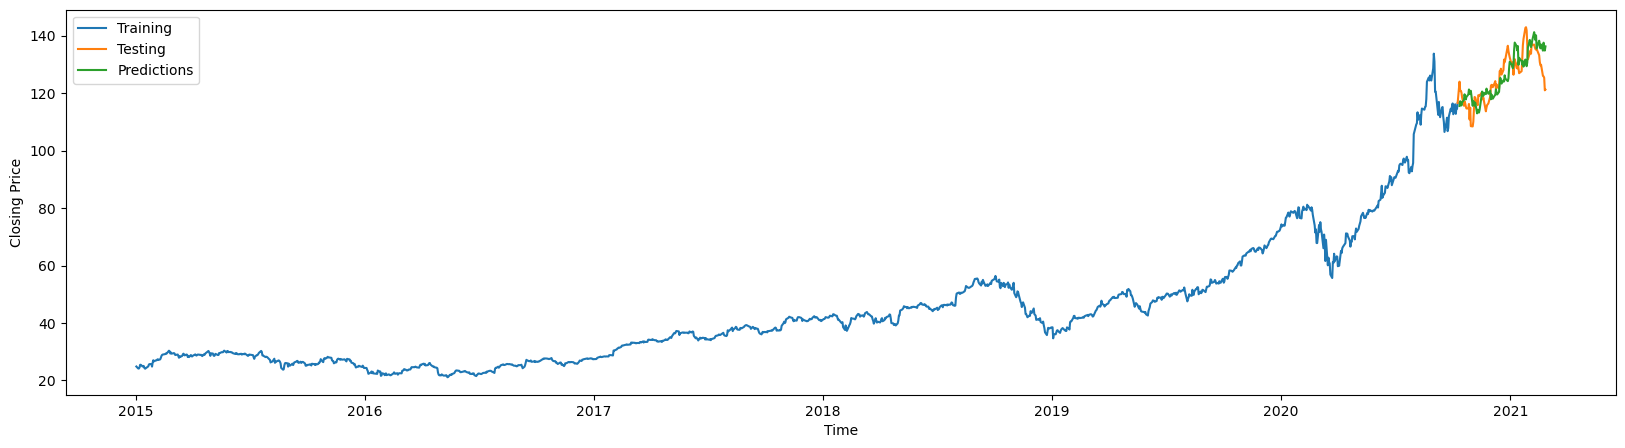

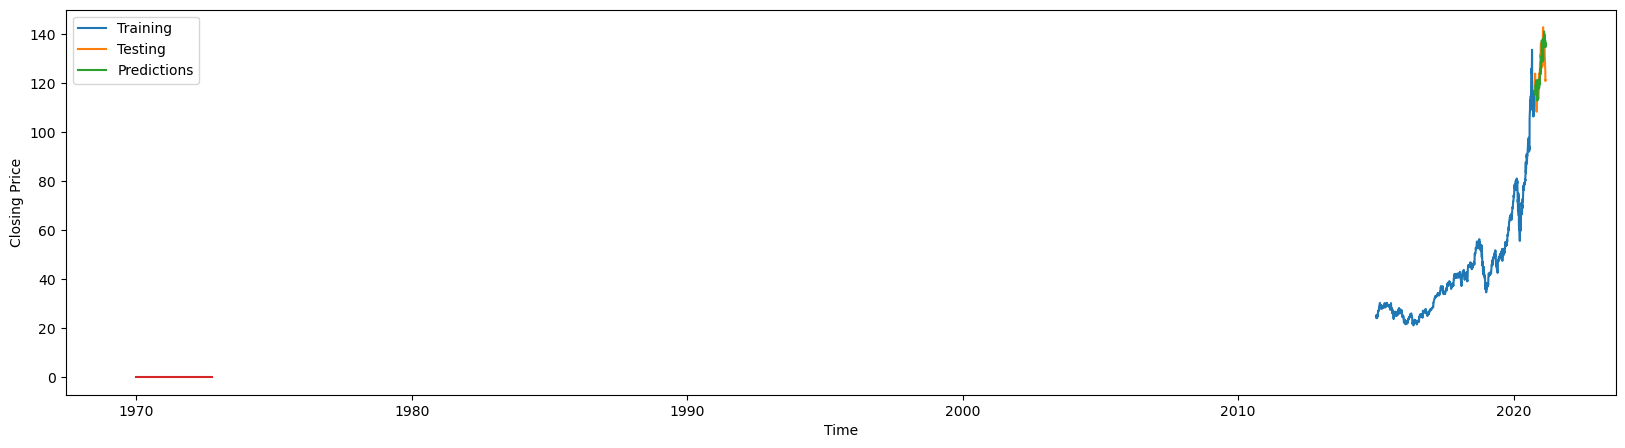

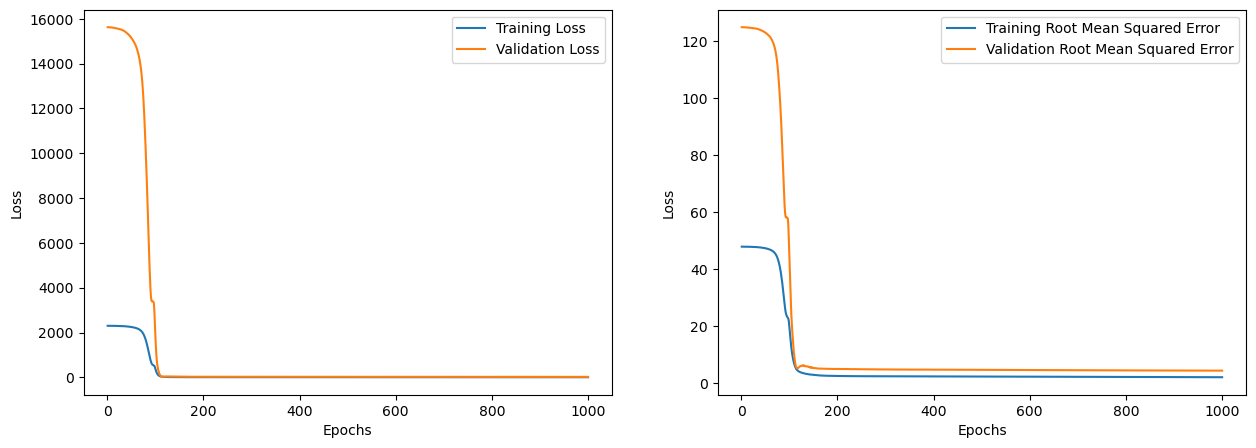

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price

In [44]:
StkData_prediction = StkData_Model.predict(StkData_Test_X)

In [45]:
plt.figure(figsize=(20, 5))
plt.plot(StkData['Date'][StkData['Date'] < '2020-10-12'], StkData['Adj Close'][StkData['Date'] < '2020-10-12'], label = 'Training')
plt.plot(StkData['Date'][StkData['Date'] >= '2020-10-09'], StkData['Adj Close'][StkData['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(StkData['Date'][StkData['Date'] >= '2020-10-12'], StkData_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [46]:
rmse = math.sqrt(mean_squared_error(StkData_Test_Y.reshape(-1, 5), StkData_prediction))
mape = np.mean(np.abs(StkData_prediction - StkData_Test_Y.reshape(-1, 5))/np.abs(StkData_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.431181913621495
MAPE: 0.027598366449401293
